In [1]:
#Import Libraries
# Math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Pre-Preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

# Evaluation and comparision of all the models

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

In [2]:
#Importing Dataset
data = pd.read_csv('data.csv') # Load the breast cancer dataset

In [3]:
#Printing information or statistics of the cancer dataframe
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
#Checking and Counting the number of (NAN, NaN, na) values in each column
data.isnull().values.any()

True

In [6]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#Dropping column with all missing values
data = data.dropna(axis=1)

In [8]:
#count of rows and columns without Nan
data.shape

(569, 32)

In [9]:
#Checking dataset again for any missing values
data.isnull().values.any()

False

In [10]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

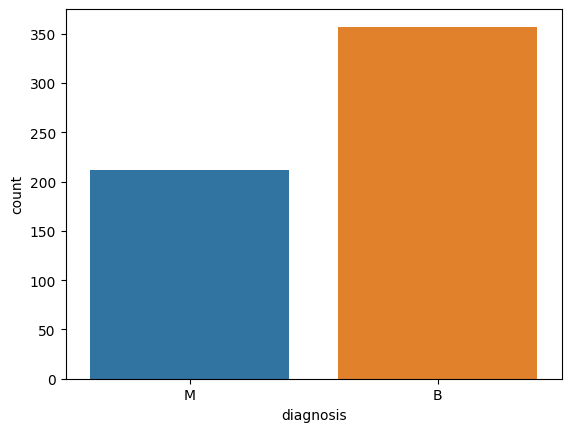

In [12]:
sns.countplot(data=data, x='diagnosis')

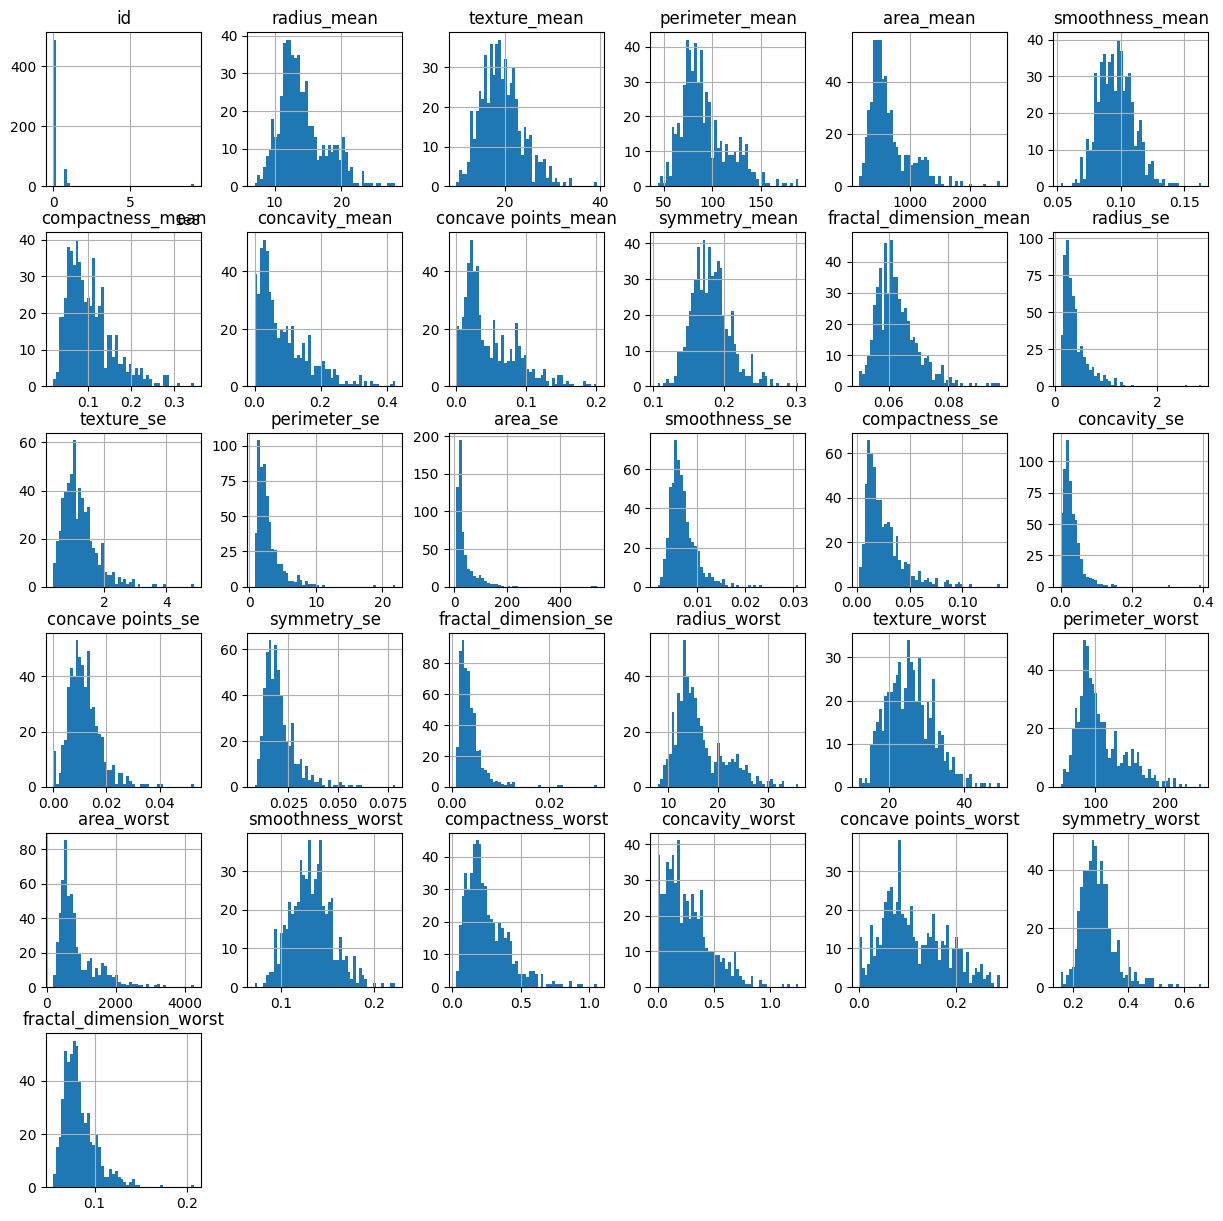

In [13]:
#Visualizing the Data by plotting histogram
data.hist(bins = 50, figsize = (15,15))
plt.show()

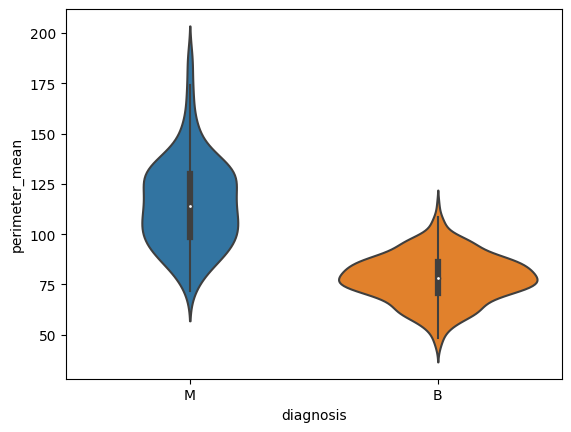

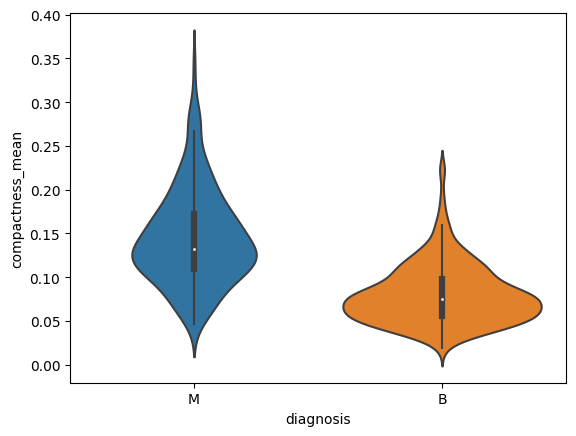

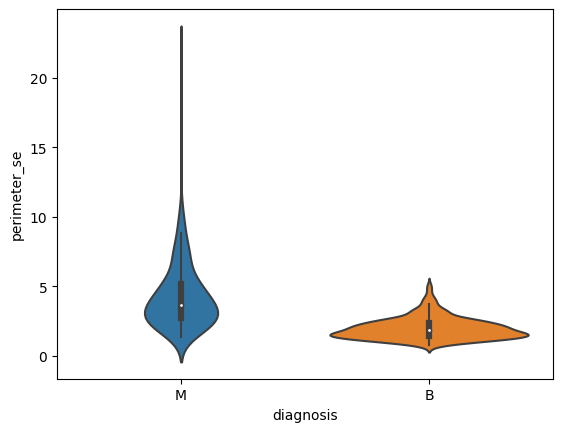

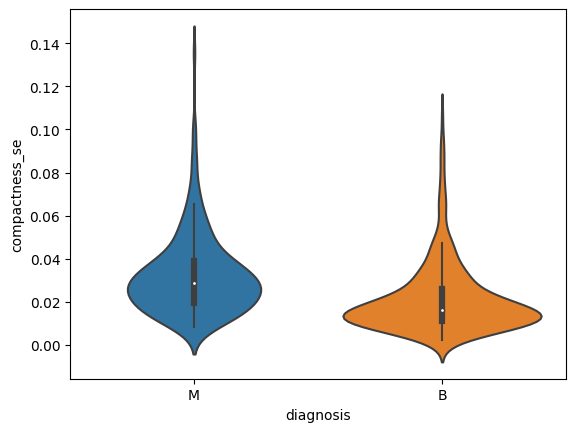

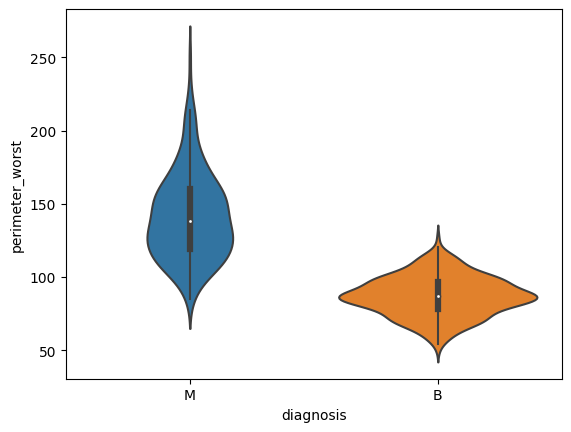

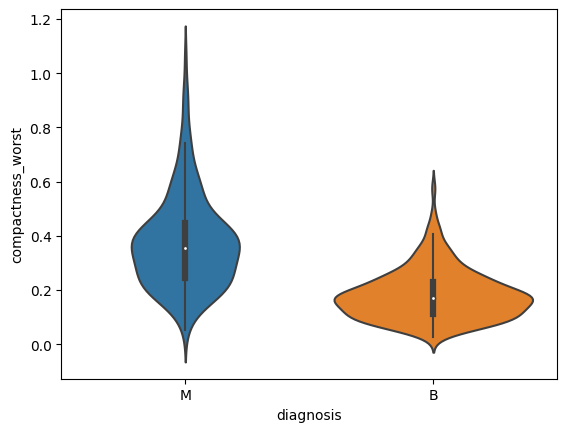

In [14]:
#Violin Plots for perimeter_mean
sns.violinplot(x = 'diagnosis', y ='perimeter_mean', data = data, size = 8)
plt.show()

#Violin Plots for compactness_mean
sns.violinplot(x = 'diagnosis', y = 'compactness_mean', data = data, size = 8)
plt.show()

#Violin Plots for perimeter_se
sns.violinplot(x = 'diagnosis', y ='perimeter_se', data = data, size = 8)
plt.show()

#Violin Plots for compactness_se
sns.violinplot(x = 'diagnosis', y = 'compactness_se', data = data, size = 8)
plt.show()

#Violin Plots for perimeter_worst
sns.violinplot(x = 'diagnosis', y ='perimeter_worst', data = data, size = 8)
plt.show()

#Violin Plots for compactness_worst
sns.violinplot(x = 'diagnosis', y = 'compactness_worst', data = data, size = 8)
plt.show()

In [15]:
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int8

In [16]:
#Correlation
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Axes: >

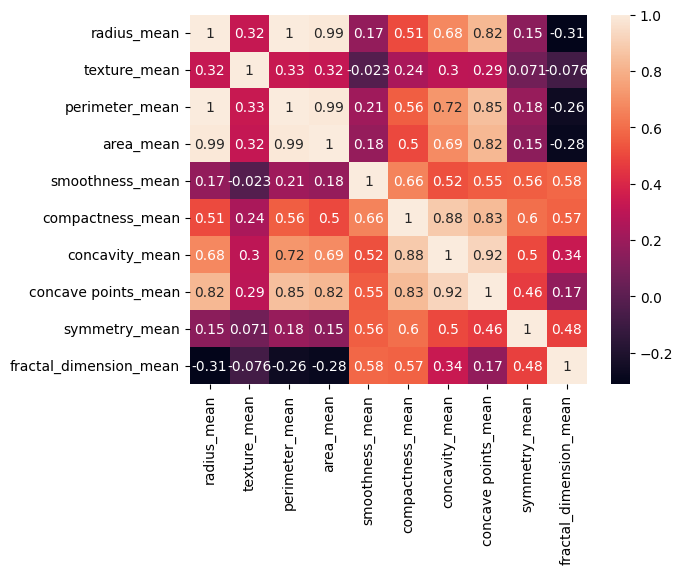

In [17]:
#Visualizing correlation for mean features
sns.heatmap(data.iloc[:,2:12].corr(), annot = True)

<Axes: >

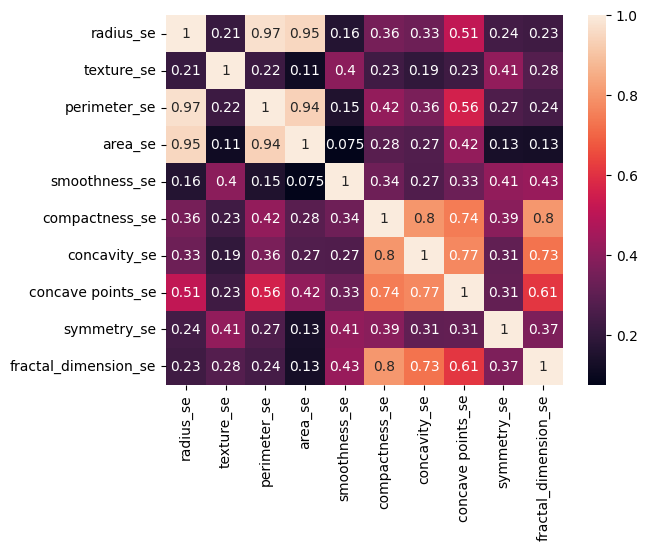

In [18]:
#Visualizing correlation for standard error features
sns.heatmap(data.iloc[:,12:22].corr(), annot = True)

<Axes: >

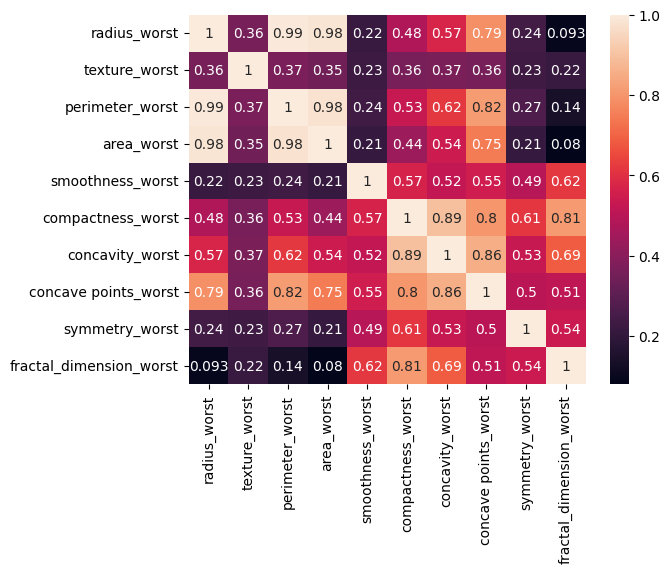

In [19]:
#Visualizing correlation for worst features
sns.heatmap(data.iloc[:,22:32].corr(), annot = True)

<Axes: >

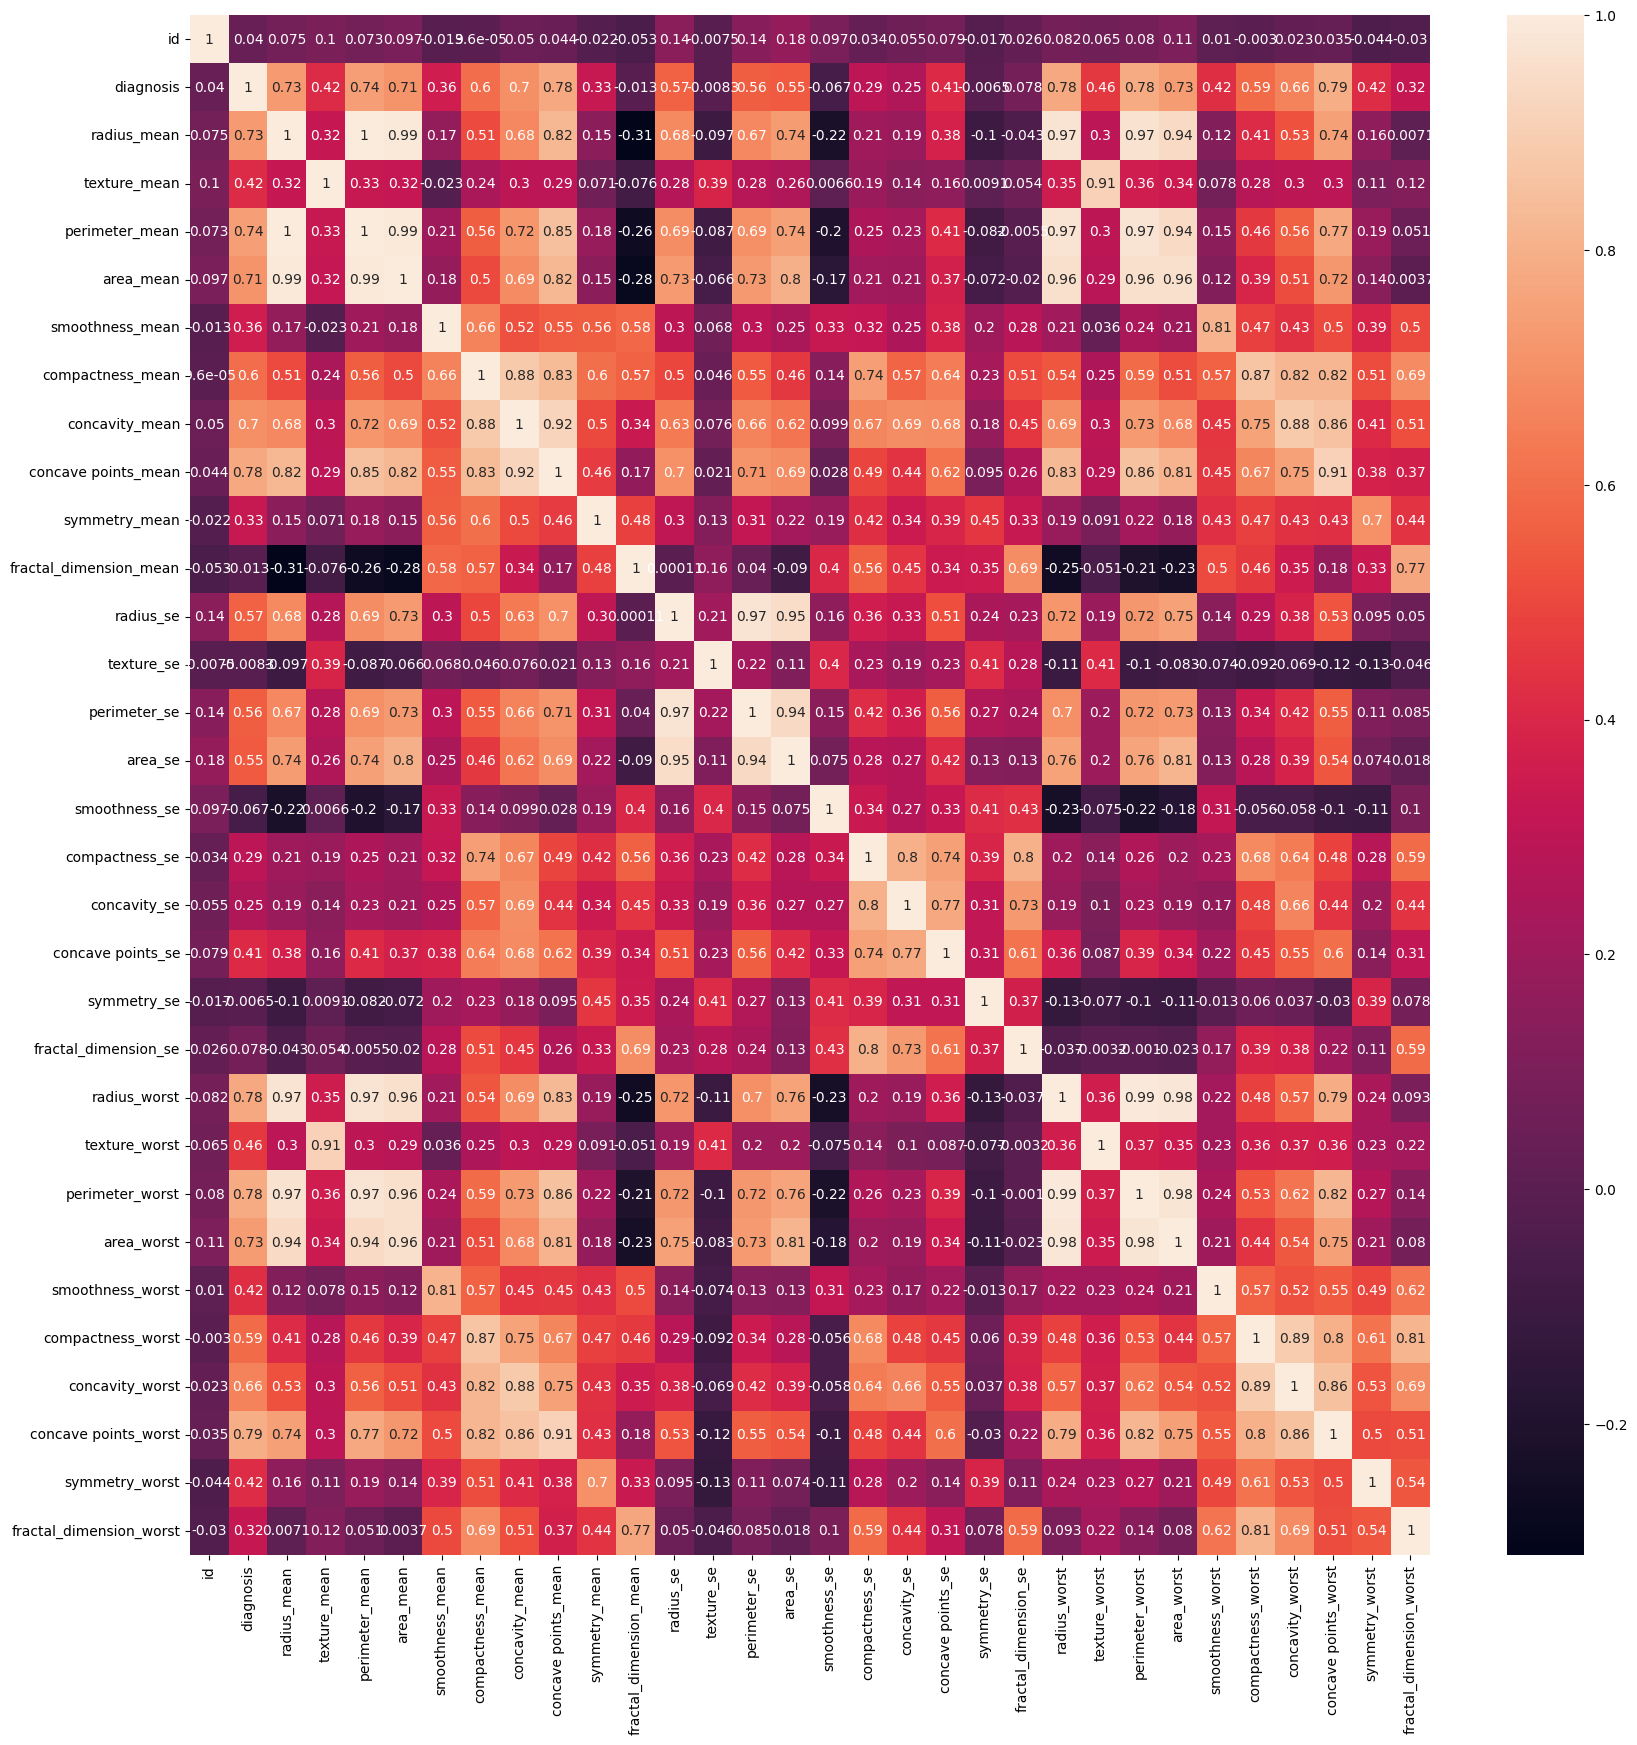

In [20]:
# Visualizing correlation for all features
plt.figure(figsize =(20,20))
sns.heatmap(data.corr(), annot =True)

In [21]:
#Splitting dataset into independent and dependent data
X = data.iloc[:,2:32].values
Y = data.iloc[:,1].values

In [22]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=101)

In [23]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Logistic Regression

logreg= LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


# Linear Regression

linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)


# Gradient Boosting Classifier

GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)


# Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


# XGB Classifier

XGB = XGBClassifier() 
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)



# Support Vector classifier

svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)


# Gaussian Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [25]:
models = []

Z = [SVC(), DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier(), XGBClassifier(),
     RandomForestClassifier(), GradientBoostingClassifier(), GaussianNB(), LinearRegression()]

X = ["SVC", "DecisionTreeClassifier", "LogisticRegression", "KNeighborsClassifier", "XGB",
     "RandomForestClassifier", "GradientBoostingClassifier", "NaiveBayes", "LinearRegression"]

In [26]:
for i in range(len(Z)):
    model = Z[i]
    model.fit(X_train, y_train)
    if isinstance(model, LinearRegression):
        pred = model.predict(X_test)
        pred = [round(val) for val in pred]  # Round predictions to the nearest integer for comparison
    else:
        pred = model.predict(X_test)
    models.append(accuracy_score(pred, y_test))

In [27]:
d = { "Algorithm" : X, "Accuracy" : models }
data_frame = pd.DataFrame(d)
data_frame

,Algorithm,Accuracy
0,SVC,0.986014
1,DecisionTreeClassifier,0.909091
2,LogisticRegression,0.986014
3,KNeighborsClassifier,0.972028
4,XGB,0.972028
5,RandomForestClassifier,0.965035
6,GradientBoostingClassifier,0.979021
7,NaiveBayes,0.930070
8,LinearRegression,0.930070


In [28]:
cm = np.array(confusion_matrix(y_test, y_pred_svc, labels=[1,0]))
confusion_mat_1= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])
print("SVC")
confusion_mat_1

SVC


,predicted_cancer,predicted_healthy
cancer,54,1
healthy,1,87


In [29]:
cm = np.array(confusion_matrix(y_test, y_pred_dt, labels=[1,0]))
confusion_mat_2= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])
print("Descision Tree")
confusion_mat_2

Descision Tree


,predicted_cancer,predicted_healthy
cancer,51,4
healthy,10,78


In [30]:
cm = np.array(confusion_matrix(y_test, y_pred_rf, labels=[1,0]))
confusion_mat_3= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])
print("Random Forest")
confusion_mat_3

Random Forest


,predicted_cancer,predicted_healthy
cancer,54,1
healthy,3,85


In [31]:
cm = np.array(confusion_matrix(y_test, y_pred_knn, labels=[1,0]))
confusion_mat_4= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])
print("KNN")
confusion_mat_4

KNN


,predicted_cancer,predicted_healthy
cancer,52,3
healthy,1,87


In [32]:
cm = np.array(confusion_matrix(y_test, y_pred_nb, labels=[1,0]))
confusion_mat_5= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])
print("Naive Bayes")
confusion_mat_5

Naive Bayes


,predicted_cancer,predicted_healthy
cancer,51,4
healthy,6,82


In [33]:
cm = np.array(confusion_matrix(y_test, y_pred_logreg, labels=[1,0]))
confusion_mat_6= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])
print("Logistic Regression")
confusion_mat_6

Logistic Regression


,predicted_cancer,predicted_healthy
cancer,54,1
healthy,1,87


In [34]:
cm = np.array(confusion_matrix(y_test, y_pred_XGB, labels=[1,0]))
confusion_mat_7= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])
print("XGB")
confusion_mat_7

XGB


,predicted_cancer,predicted_healthy
cancer,53,2
healthy,2,86


In [35]:
models = []
models1 = []
models2 = []
models3 = []
models4 = []


for i in range(len(Z)):
    model = Z[i]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)  # Obtain binary predictions directly
    
    # Ensure y_test and pred contain only binary values
    binary_y_test = y_test.astype(int)
    binary_pred = pred.astype(int)
    
    models.append(accuracy_score(binary_y_test, binary_pred))
    models1.append(precision_score(binary_y_test, binary_pred))
    models2.append(recall_score(binary_y_test, binary_pred))
    models3.append(f1_score(binary_y_test, binary_pred))
    models4.append(roc_auc_score(binary_y_test, binary_pred))

In [36]:
d = {  "Algorithm" : X , "Accuracy" : models ,"Precision" : models1 ,"Recall" : models2 ,"F1-Score" : models3 ,"AUC" : models4 }
data_frame = pd.DataFrame(d)
data_frame

,Algorithm,Accuracy,Precision,Recall,F1-Score,AUC
0,SVC,0.986014,0.981818,0.981818,0.981818,0.985227
1,DecisionTreeClassifier,0.916084,0.864407,0.927273,0.894737,0.918182
2,LogisticRegression,0.986014,0.981818,0.981818,0.981818,0.985227
3,KNeighborsClassifier,0.972028,0.981132,0.945455,0.962963,0.967045
4,XGB,0.972028,0.963636,0.963636,0.963636,0.970455
5,RandomForestClassifier,0.972028,0.947368,0.981818,0.964286,0.973864
6,GradientBoostingClassifier,0.972028,0.947368,0.981818,0.964286,0.973864
7,NaiveBayes,0.930070,0.894737,0.927273,0.910714,0.929545
8,LinearRegression,0.755245,1.000000,0.363636,0.533333,0.681818


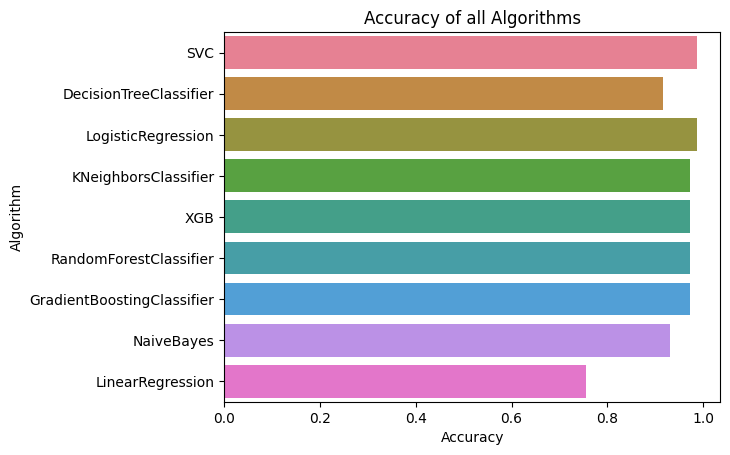

In [37]:
sns.barplot(x=data_frame['Accuracy'], y=data_frame['Algorithm'], palette="husl")
plt.title('Accuracy of all Algorithms')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()

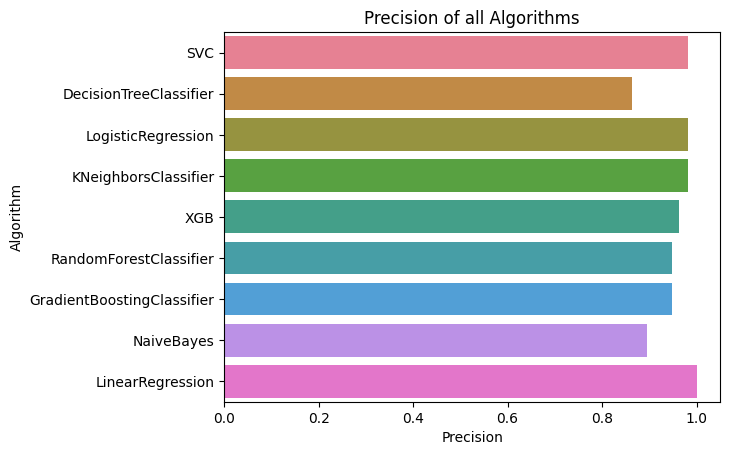

In [38]:
sns.barplot(x=data_frame['Precision'], y=data_frame['Algorithm'], palette="husl")
plt.title('Precision of all Algorithms')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
plt.show()

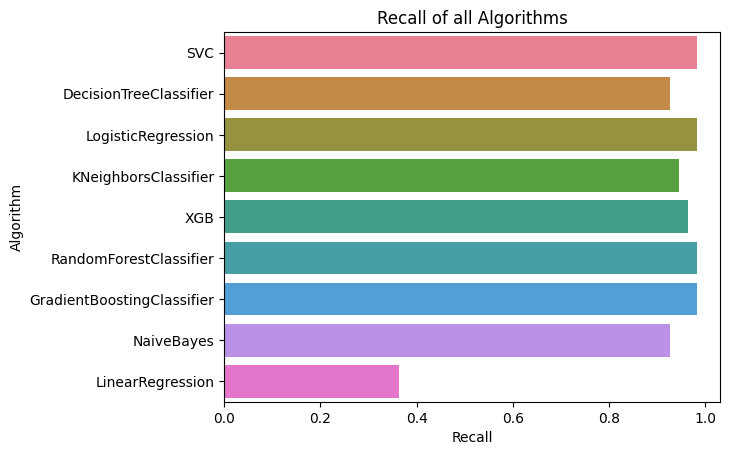

In [39]:
sns.barplot(x=data_frame['Recall'], y=data_frame['Algorithm'], palette="husl")
plt.title('Recall of all Algorithms')
plt.xlabel('Recall')
plt.ylabel('Algorithm')
plt.show()

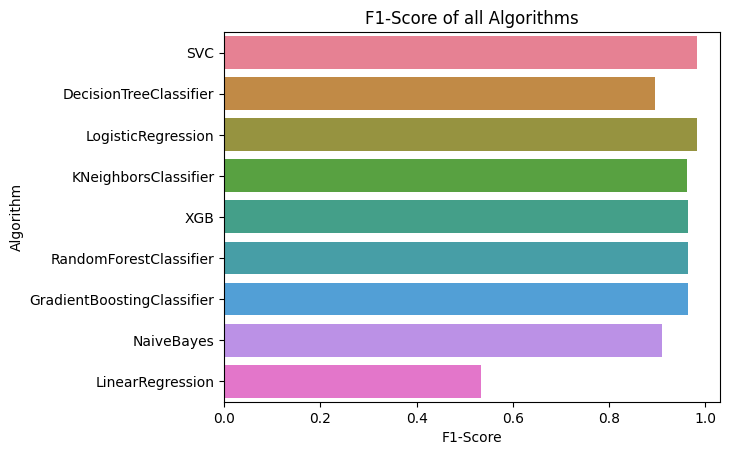

In [40]:
sns.barplot(x=data_frame['F1-Score'], y=data_frame['Algorithm'], palette="husl")
plt.title('F1-Score of all Algorithms')
plt.xlabel('F1-Score')
plt.ylabel('Algorithm')
plt.show()

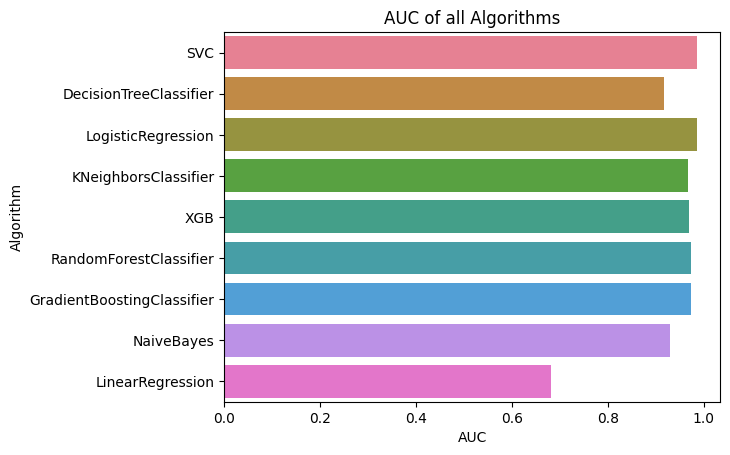

In [41]:
sns.barplot(x=data_frame['AUC'], y=data_frame['Algorithm'], palette="husl")
plt.title('AUC of all Algorithms')
plt.xlabel('AUC')
plt.ylabel('Algorithm')
plt.show()